In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

In [4]:
def get_ref():
    """returns a DataFrame containing all the reference structure values"""
    clash_df = pd.read_csv("data/reference-clashes.csv", index_col = 0)
    cor_df = pd.read_csv("data/reference-correlation.csv", index_col = 0)
    ref_df = clash_df.join(cor_df["correlation"])
    return ref_df

def get_ref_cor():
    cor_df = pd.read_csv("data/reference-correlation.csv", index_col = 0)
    return cor_df

def make_water_df_list(run):
    
    df_3J95 = pd.read_csv(("../RAW_DATA/{}/3J95_correlation.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("../RAW_DATA/{}/3J96_correlation.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("../RAW_DATA/{}/5GRS_correlation.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("../RAW_DATA/{}/5HNY_correlation.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("../RAW_DATA/{}/5WCB_correlation.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("../RAW_DATA/{}/6ACG_correlation.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("../RAW_DATA/{}/6AHF_correlation.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("../RAW_DATA/{}/6IRF_correlation.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("../RAW_DATA/{}/6N1Q_correlation.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("../RAW_DATA/{}/6N7G_correlation.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("../RAW_DATA/{}/6N8Z_correlation.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("../RAW_DATA/{}/6R7I_correlation.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("../RAW_DATA/{}/6UBY_correlation.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("../RAW_DATA/{}/6UC0_correlation.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

def probe_ref():
    """returns a DataFrame containing all the reference structure values"""
    probe_df = pd.read_csv("data/ref-probe.csv", index_col = 0)
    return probe_df


def make_probe_list(run):
    
    df_3J95 = pd.read_csv(("../RAW_DATA/{}/3J95_probe.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("../RAW_DATA/{}/3J96_probe.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("../RAW_DATA/{}/5GRS_probe.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("../RAW_DATA/{}/5HNY_probe.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("../RAW_DATA/{}/5WCB_probe.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("../RAW_DATA/{}/6ACG_probe.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("../RAW_DATA/{}/6AHF_probe.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("../RAW_DATA/{}/6IRF_probe.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("../RAW_DATA/{}/6N1Q_probe.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("../RAW_DATA/{}/6N7G_probe.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("../RAW_DATA/{}/6N8Z_probe.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("../RAW_DATA/{}/6R7I_probe.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("../RAW_DATA/{}/6UBY_probe.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("../RAW_DATA/{}/6UC0_probe.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

,HADDOCK-score,correlation,atomic-clashes,resolution
HADDOCK-score,1.000000,-0.164729,0.629320,-0.438056
correlation,-0.164729,1.000000,-0.257792,0.690833
atomic-clashes,0.629320,-0.257792,1.000000,-0.342114
resolution,-0.438056,0.690833,-0.342114,1.000000


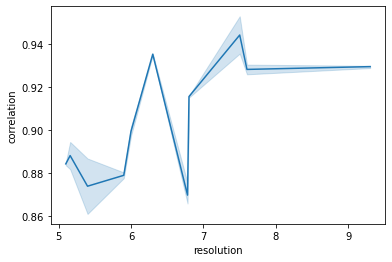

In [5]:
df_list = make_water_df_list("SA_CTRD")

map_res_df = pd.read_csv(("data/reference-resolution.csv"), index_col="structure")
data_frame = pd.DataFrame()
for df in iter(df_list):
        structure = df.index[0][:4]
        df = df.sort_values("HADDOCK-score")[0:4].reset_index().drop("structure", axis=1)
        ref = []
        for i in range(4):
            ref.append(map_res_df.loc[structure, "resolution"])
            
        df["resolution"] = ref
        data_frame = pd.concat([data_frame, df], ignore_index=True)
        
sns.lineplot(y="correlation", x="resolution", data=data_frame)

data_frame.corr()

In [6]:
df_list = make_probe_list("SA_CTRD")

map_res_df = pd.read_csv(("data/reference-resolution.csv"), index_col="structure")
data_frame_probe = pd.DataFrame()
for df in iter(df_list):
        structure = df.index[0][:4]
        df = df.reset_index().drop("structure", axis=1)
                            
        data_frame_probe = pd.concat([data_frame_probe, df], ignore_index=True)
        

data_frame

,HADDOCK-score,correlation,atomic-clashes,resolution
0,-1407.139000,0.9318,1,7.60
1,-1376.730800,0.9323,0,7.60
2,-1370.690700,0.9306,0,7.60
3,-1364.853200,0.9305,0,7.60
4,-3601.937880,0.9243,2,7.60
5,-3554.211410,0.9257,2,7.60
6,-3553.561900,0.9249,1,7.60
7,-3537.231300,0.9255,1,7.60
8,-2330.169820,0.8903,0,5.40
9,-2298.586272,0.8915,0,5.40


In [7]:
data_frame_probe
new_df = pd.concat([data_frame, data_frame_probe], axis = 1)
new_df.corr()

,HADDOCK-score,correlation,atomic-clashes,resolution,probe-score,probe-score/A**2
HADDOCK-score,1.000000,-0.164729,0.629320,-0.438056,-0.867654,-0.649852
correlation,-0.164729,1.000000,-0.257792,0.690833,0.250292,0.120742
atomic-clashes,0.629320,-0.257792,1.000000,-0.342114,-0.723969,-0.484523
resolution,-0.438056,0.690833,-0.342114,1.000000,0.372464,0.065772
probe-score,-0.867654,0.250292,-0.723969,0.372464,1.000000,0.791763
probe-score/A**2,-0.649852,0.120742,-0.484523,0.065772,0.791763,1.000000
